## Using low dimensional embeddings to discover subtypes of breast cancer

This notebook is largely based on https://towardsdatascience.com/reduce-dimensions-for-single-cell-4224778a2d67 (credit to Nikolay Oskolkov).

https://www.nature.com/articles/s41467-018-07582-3#data-availability

In [36]:
import pandas as pd
import numpy as np
import GEOparse
from matplotlib import pyplot as plt

In [2]:
GEO_ID = "GSE111229" # from the article 

In [3]:
rna_seq = GEOparse.get_GEO(geo=GEO_ID, destdir="./")


15-Nov-2020 20:51:51 DEBUG utils - Directory ./ already exists. Skipping.
15-Nov-2020 20:51:51 INFO GEOparse - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE111nnn/GSE111229/soft/GSE111229_family.soft.gz to ./GSE111229_family.soft.gz
100%|█████████████████████████████████████████████████████████████████████████████| 38.0k/38.0k [00:01<00:00, 32.1kB/s]
15-Nov-2020 20:51:54 DEBUG downloader - Size validation passed
15-Nov-2020 20:51:54 DEBUG downloader - Moving C:\Users\Peder\AppData\Local\Temp\tmpdax4j5_h to C:\Users\Peder\Documents\repos\CBM-101\CBM101\F_Machine_learning\2_Unsupervised-Learning\GSE111229_family.soft.gz
15-Nov-2020 20:51:54 DEBUG downloader - Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE111nnn/GSE111229/soft/GSE111229_family.soft.gz
15-Nov-2020 20:51:54 INFO GEOparse - Parsing ./GSE111229_family.soft.gz: 
15-Nov-2020 20:51:54 DEBUG GEOparse - DATABASE: GeoMiame
15-Nov-2020 20:51:54 DEBUG GEOparse - SERIES: GSE111229
15-Nov-2020 20:51:54 DEBUG 

15-Nov-2020 20:51:56 DEBUG GEOparse - SAMPLE: GSM3025971
15-Nov-2020 20:51:56 DEBUG GEOparse - SAMPLE: GSM3025972
15-Nov-2020 20:51:56 DEBUG GEOparse - SAMPLE: GSM3025973
15-Nov-2020 20:51:56 DEBUG GEOparse - SAMPLE: GSM3025974
15-Nov-2020 20:51:56 DEBUG GEOparse - SAMPLE: GSM3025975
15-Nov-2020 20:51:56 DEBUG GEOparse - SAMPLE: GSM3025976
15-Nov-2020 20:51:56 DEBUG GEOparse - SAMPLE: GSM3025977
15-Nov-2020 20:51:56 DEBUG GEOparse - SAMPLE: GSM3025978
15-Nov-2020 20:51:56 DEBUG GEOparse - SAMPLE: GSM3025979
15-Nov-2020 20:51:56 DEBUG GEOparse - SAMPLE: GSM3025980
15-Nov-2020 20:51:56 DEBUG GEOparse - SAMPLE: GSM3025981
15-Nov-2020 20:51:56 DEBUG GEOparse - SAMPLE: GSM3025982
15-Nov-2020 20:51:56 DEBUG GEOparse - SAMPLE: GSM3025983
15-Nov-2020 20:51:56 DEBUG GEOparse - SAMPLE: GSM3025984
15-Nov-2020 20:51:56 DEBUG GEOparse - SAMPLE: GSM3025985
15-Nov-2020 20:51:56 DEBUG GEOparse - SAMPLE: GSM3025986
15-Nov-2020 20:51:56 DEBUG GEOparse - SAMPLE: GSM3025987
15-Nov-2020 20:51:56 DEBUG GEOp

15-Nov-2020 20:51:58 DEBUG GEOparse - SAMPLE: GSM3026115
15-Nov-2020 20:51:58 DEBUG GEOparse - SAMPLE: GSM3026116
15-Nov-2020 20:51:58 DEBUG GEOparse - SAMPLE: GSM3026117
15-Nov-2020 20:51:58 DEBUG GEOparse - SAMPLE: GSM3026118
15-Nov-2020 20:51:58 DEBUG GEOparse - SAMPLE: GSM3026119
15-Nov-2020 20:51:58 DEBUG GEOparse - SAMPLE: GSM3026120
15-Nov-2020 20:51:58 DEBUG GEOparse - SAMPLE: GSM3026121
15-Nov-2020 20:51:58 DEBUG GEOparse - SAMPLE: GSM3026122
15-Nov-2020 20:51:58 DEBUG GEOparse - SAMPLE: GSM3026123
15-Nov-2020 20:51:58 DEBUG GEOparse - SAMPLE: GSM3026124
15-Nov-2020 20:51:58 DEBUG GEOparse - SAMPLE: GSM3026125
15-Nov-2020 20:51:58 DEBUG GEOparse - SAMPLE: GSM3026126
15-Nov-2020 20:51:58 DEBUG GEOparse - SAMPLE: GSM3026127
15-Nov-2020 20:51:58 DEBUG GEOparse - SAMPLE: GSM3026128
15-Nov-2020 20:51:58 DEBUG GEOparse - SAMPLE: GSM3026129
15-Nov-2020 20:51:58 DEBUG GEOparse - SAMPLE: GSM3026130
15-Nov-2020 20:51:58 DEBUG GEOparse - SAMPLE: GSM3026131
15-Nov-2020 20:51:58 DEBUG GEOp

15-Nov-2020 20:51:59 DEBUG GEOparse - SAMPLE: GSM3026259
15-Nov-2020 20:51:59 DEBUG GEOparse - SAMPLE: GSM3026260
15-Nov-2020 20:51:59 DEBUG GEOparse - SAMPLE: GSM3026261
15-Nov-2020 20:51:59 DEBUG GEOparse - SAMPLE: GSM3026262
15-Nov-2020 20:51:59 DEBUG GEOparse - SAMPLE: GSM3026263
15-Nov-2020 20:51:59 DEBUG GEOparse - SAMPLE: GSM3026264
15-Nov-2020 20:51:59 DEBUG GEOparse - SAMPLE: GSM3026265
15-Nov-2020 20:51:59 DEBUG GEOparse - SAMPLE: GSM3026266
15-Nov-2020 20:51:59 DEBUG GEOparse - SAMPLE: GSM3026267
15-Nov-2020 20:51:59 DEBUG GEOparse - SAMPLE: GSM3026268
15-Nov-2020 20:52:00 DEBUG GEOparse - SAMPLE: GSM3026269
15-Nov-2020 20:52:00 DEBUG GEOparse - SAMPLE: GSM3026270
15-Nov-2020 20:52:00 DEBUG GEOparse - SAMPLE: GSM3026271
15-Nov-2020 20:52:00 DEBUG GEOparse - SAMPLE: GSM3026272
15-Nov-2020 20:52:00 DEBUG GEOparse - SAMPLE: GSM3026273
15-Nov-2020 20:52:00 DEBUG GEOparse - SAMPLE: GSM3026274
15-Nov-2020 20:52:00 DEBUG GEOparse - SAMPLE: GSM3026275
15-Nov-2020 20:52:00 DEBUG GEOp

15-Nov-2020 20:52:01 DEBUG GEOparse - SAMPLE: GSM3026403
15-Nov-2020 20:52:01 DEBUG GEOparse - SAMPLE: GSM3026404
15-Nov-2020 20:52:01 DEBUG GEOparse - SAMPLE: GSM3026405
15-Nov-2020 20:52:01 DEBUG GEOparse - SAMPLE: GSM3026406
15-Nov-2020 20:52:01 DEBUG GEOparse - SAMPLE: GSM3026407
15-Nov-2020 20:52:01 DEBUG GEOparse - SAMPLE: GSM3026408
15-Nov-2020 20:52:01 DEBUG GEOparse - SAMPLE: GSM3026409
15-Nov-2020 20:52:01 DEBUG GEOparse - SAMPLE: GSM3026410
15-Nov-2020 20:52:01 DEBUG GEOparse - SAMPLE: GSM3026411
15-Nov-2020 20:52:01 DEBUG GEOparse - SAMPLE: GSM3026412
15-Nov-2020 20:52:01 DEBUG GEOparse - SAMPLE: GSM3026413
15-Nov-2020 20:52:01 DEBUG GEOparse - SAMPLE: GSM3026414
15-Nov-2020 20:52:01 DEBUG GEOparse - SAMPLE: GSM3026415
15-Nov-2020 20:52:01 DEBUG GEOparse - SAMPLE: GSM3026416
15-Nov-2020 20:52:01 DEBUG GEOparse - SAMPLE: GSM3026417
15-Nov-2020 20:52:01 DEBUG GEOparse - SAMPLE: GSM3026418
15-Nov-2020 20:52:01 DEBUG GEOparse - SAMPLE: GSM3026419
15-Nov-2020 20:52:01 DEBUG GEOp

15-Nov-2020 20:52:03 DEBUG GEOparse - SAMPLE: GSM3026547
15-Nov-2020 20:52:03 DEBUG GEOparse - SAMPLE: GSM3026548
15-Nov-2020 20:52:03 DEBUG GEOparse - SAMPLE: GSM3026549
15-Nov-2020 20:52:03 DEBUG GEOparse - SAMPLE: GSM3026550
15-Nov-2020 20:52:03 DEBUG GEOparse - SAMPLE: GSM3026551
15-Nov-2020 20:52:03 DEBUG GEOparse - SAMPLE: GSM3026552
15-Nov-2020 20:52:03 DEBUG GEOparse - SAMPLE: GSM3026553
15-Nov-2020 20:52:03 DEBUG GEOparse - SAMPLE: GSM3026554
15-Nov-2020 20:52:03 DEBUG GEOparse - SAMPLE: GSM3026555
15-Nov-2020 20:52:03 DEBUG GEOparse - SAMPLE: GSM3026556
15-Nov-2020 20:52:03 DEBUG GEOparse - SAMPLE: GSM3026557
15-Nov-2020 20:52:03 DEBUG GEOparse - SAMPLE: GSM3026558
15-Nov-2020 20:52:03 DEBUG GEOparse - SAMPLE: GSM3026559
15-Nov-2020 20:52:03 DEBUG GEOparse - SAMPLE: GSM3026560
15-Nov-2020 20:52:03 DEBUG GEOparse - SAMPLE: GSM3026561
15-Nov-2020 20:52:03 DEBUG GEOparse - SAMPLE: GSM3026562
15-Nov-2020 20:52:03 DEBUG GEOparse - SAMPLE: GSM3026563
15-Nov-2020 20:52:03 DEBUG GEOp

In [4]:
dir(rna_seq)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__metaclass__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_metadata_as_string',
 '_get_object_as_soft',
 '_phenotype_data',
 'database',
 'download_SRA',
 'download_supplementary_files',
 'geotype',
 'get_accession',
 'get_metadata_attribute',
 'get_type',
 'gpls',
 'gsms',
 'merge_and_average',
 'metadata',
 'name',
 'phenotype_data',
 'pivot_and_annotate',
 'pivot_samples',
 'relations',
 'show_metadata',
 'to_soft']

In [5]:
rna_seq.download_SRA??

In [6]:
rna_seq.geotype

'SERIES'

In [8]:
rna_seq.phenotype_data.shape

(768, 37)

In [ ]:
rna_seq.phenotype_data.shape

In [10]:
rna_seq.to_soft('test', False)

In [16]:
cafs = pd.read_csv('data/CAFs.txt', sep='\t')

In [26]:
sorted(cafs.cluster.unique())

[1, 2, 3, 4]

In [ ]:
rna_seq.

In [19]:
expr = cafs

### The expression matrix
716 cells has been sequenced, and the expression levels has been assessed for 558 genes. Arranging the cells as rows and genes as columns we obtain an *expression matrix*.

In [51]:
expr.shape

(716, 558)

In [52]:
expr

,1110020A21Rik,1110046J04Rik,1190002F15Rik,1500015A07Rik,1500015O10Rik,1700010K23Rik,1700012D01Rik,1810011H11Rik,2010204K13Rik,2310057J18Rik,...,Wif1,Wisp2,Yy2,Zfp2,Zfp36,Zfp454,Zfp652os,Zfp81,Zfp944,cluster
SS2_15_0048_A3,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,107.526495,0.0,201.533078,0.000000,0.0,0.0,0.000000,1
SS2_15_0048_A6,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,230.755035,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,175.071938,0.000000,0.0,0.0,0.000000,1
SS2_15_0048_A5,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,375.177236,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,290.743379,0.000000,0.0,0.0,0.000000,1
SS2_15_0048_A4,0.000000,0.0,0.000000,0.0,891.488043,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,2
SS2_15_0048_A1,43.324338,0.0,0.000000,0.0,0.000000,0.0,0.0,20.527119,65.766243,0.000000,...,0.0,0.0,0.000000,0.0,768.997431,0.000000,0.0,0.0,2.413509,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS2_15_0049_P19,0.000000,0.0,0.000000,0.0,1012.999120,0.0,0.0,0.000000,37.231979,0.000000,...,0.0,0.0,21.453518,0.0,19.602162,1.869748,0.0,0.0,34.520490,3
SS2_15_0049_P18,37.696628,0.0,0.000000,0.0,1562.238996,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,41.641731,0.000000,0.0,0.0,0.000000,2
SS2_15_0049_P21,0.000000,0.0,53.257827,0.0,5.817578,0.0,0.0,112.228306,62.542484,19.583052,...,0.0,0.0,0.000000,0.0,70.246018,0.000000,0.0,0.0,0.000000,1
SS2_15_0049_P23,0.000000,0.0,0.000000,0.0,2411.205731,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,55.993812,2


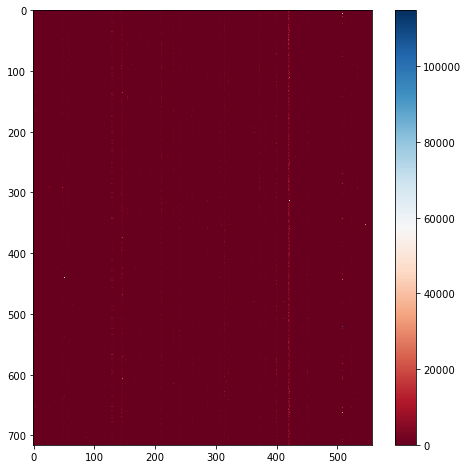

In [64]:
plt.figure(figsize=(8,8))
plt.imshow(expr.values, cmap='RdBu', )
plt.colorbar()

#### Exercise. The data is very sparse, can you quantify how sparse it is? (i.e. how many of the entries are 0) 

In [68]:
# %load solutions/...

np.count_nonzero(expr.values) / np.prod(expr.shape)

# only 20% of the entries are non-zero.

0.19622154141887427

In [20]:
print("\n" + "Dimensions of input file: " + str(expr.shape) + "\n")
print("\n" + "Last column corresponds to cluster assignments: " + "\n")
print(expr.iloc[0:4, (expr.shape[1]-4):expr.shape[1]])
X = expr.values[:,0:(expr.shape[1]-1)]
Y = expr.values[:,expr.shape[1]-1] #cluster
X = np.log(X + 1)


Dimensions of input file: (716, 558)


Last column corresponds to cluster assignments: 

                Zfp652os  Zfp81  Zfp944  cluster
SS2_15_0048_A3       0.0    0.0     0.0        1
SS2_15_0048_A6       0.0    0.0     0.0        1
SS2_15_0048_A5       0.0    0.0     0.0        1
SS2_15_0048_A4       0.0    0.0     0.0        2


In this familiar format (rows as samples, columns as features) we are ready to perform machine learning!

In [53]:
cafs.dtypes.unique()

array([dtype('float64'), dtype('int64')], dtype=object)

In [54]:
rna_seq.phenotype_data.head()

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,taxid_ch1,...,contact_zip/postal_code,contact_country,instrument_model,library_selection,library_source,library_strategy,relation,supplementary_file_1,series_id,data_row_count
GSM3025845,SS2_15_0048_A1,GSM3025845,Public on Nov 23 2018,Feb 28 2018,Nov 23 2018,SRA,1,Mammary tumor fibroblast,Mus musculus,10090,...,22381,Sweden,Illumina HiSeq 2000,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,NONE,GSE111229,0
GSM3025846,SS2_15_0048_A2,GSM3025846,Public on Nov 23 2018,Feb 28 2018,Nov 23 2018,SRA,1,Mammary tumor fibroblast,Mus musculus,10090,...,22381,Sweden,Illumina HiSeq 2000,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,NONE,GSE111229,0
GSM3025847,SS2_15_0048_A3,GSM3025847,Public on Nov 23 2018,Feb 28 2018,Nov 23 2018,SRA,1,Mammary tumor fibroblast,Mus musculus,10090,...,22381,Sweden,Illumina HiSeq 2000,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,NONE,GSE111229,0
GSM3025848,SS2_15_0048_A4,GSM3025848,Public on Nov 23 2018,Feb 28 2018,Nov 23 2018,SRA,1,Mammary tumor fibroblast,Mus musculus,10090,...,22381,Sweden,Illumina HiSeq 2000,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,NONE,GSE111229,0
GSM3025849,SS2_15_0048_A5,GSM3025849,Public on Nov 23 2018,Feb 28 2018,Nov 23 2018,SRA,1,Mammary tumor fibroblast,Mus musculus,10090,...,22381,Sweden,Illumina HiSeq 2000,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,NONE,GSE111229,0


In [55]:
rna_seq.gsms['GSM3025849'].table

""


In [74]:
from sklearn.decomposition import PCA

In [79]:
from matplotlib import cm

In [80]:
dir(cm)

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'LUTSIZE',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'ScalarMappable',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_generate_cmap',
 '_reverse_cma

Text(0, 0.5, 'PC2')

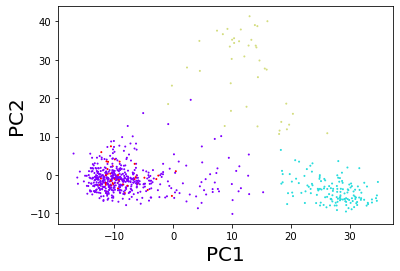

In [117]:
model = PCA()
pca = model.fit_transform(X, Y)
plt.scatter(pca[:, 0], pca[:, 1], c = Y, cmap = 'rainbow', s = 1)
plt.xlabel("PC1", fontsize = 20); plt.ylabel("PC2", fontsize = 20)
#feature_importances = pd.DataFrame({'Gene':np.array(expr.columns)[:-1], 
#                                    'Score':abs(model.coef_[0])})
#print(feature_importances.sort_values('Score', ascending = False).head(20))

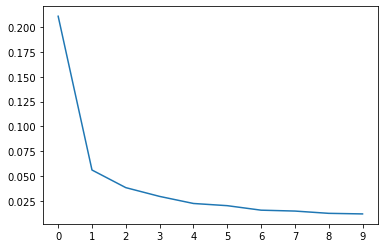

In [94]:
plt.plot(model.explained_variance_ratio_[:10])
plt.xticks(range(10));plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

        Gene      Score
422    Rn45s  39.249111
64       B2m  12.880958
212     Fth1   8.174487
287    Lars2   7.385672
147     Cst3   6.857356
315   Malat1   6.290840
420     Rgs5   4.681367
524    Timp1   4.486659
131   Col3a1   3.229705
130   Col1a2   3.062976
537  Trmt61b   3.020343
145    Crip1   2.991499
322      Mgp   2.787057
368      Mt1   2.673895
400    Postn   2.401428
534     Tpm1   2.258763
248    Hspa5   2.133318
241   Higd1b   2.094767
220     Ggt1   2.003810
122    Cldn4   1.951643


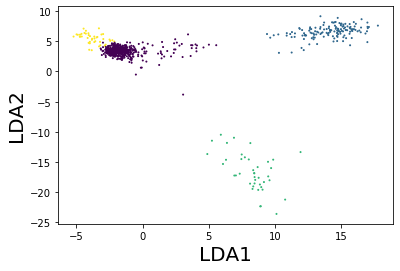

In [29]:
model = LinearDiscriminantAnalysis(n_components = 2, priors = None, shrinkage = 'auto', 
                                   solver = 'eigen', store_covariance = False, tol = 0.0001)
lda = model.fit_transform(X, Y)
plt.scatter(lda[:, 0], lda[:, 1], c = Y, cmap = 'viridis', s = 1)
plt.xlabel("LDA1", fontsize = 20); plt.ylabel("LDA2", fontsize = 20)
feature_importances = pd.DataFrame({'Gene':np.array(expr.columns)[:-1], 
                                    'Score':abs(model.coef_[0])})
print(feature_importances.sort_values('Score', ascending = False).head(20))

The way to interpret the data above: we clearly see the data lay in three clusters, suggesting  we have found 3 different separable expression-signatures. However, we also see one cluster is occupied by 2 clusters (the colors are imposed by the fact that we know the "ground truth", but unsupervised methods are generally used for data exploration in which we do not know of these things.

### Non-linear methods

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [110]:
model = TSNE(learning_rate = 10, n_components = 2, random_state = 123, perplexity = 30)
tsne = model.fit_transform(X)

Text(0, 0.5, 'tSNE2')

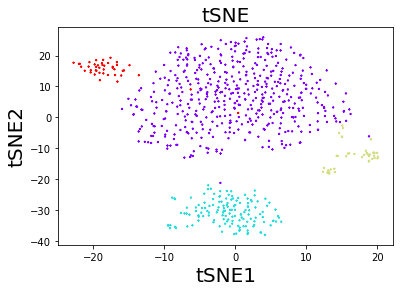

In [112]:
plt.scatter(tsne[:, 0], tsne[:, 1], c = Y, cmap = 'rainbow', s = 2, marker='x')
plt.title('tSNE', fontsize = 20)
plt.xlabel("tSNE1", fontsize = 20)
plt.ylabel("tSNE2", fontsize = 20)

Prereducing dimensions with PCA prior to tSNE

In [115]:
X_reduced = PCA(n_components = 30).fit_transform(X)
model = TSNE(learning_rate = 10, n_components = 2, random_state = 123, perplexity = 30)
tsne = model.fit_transform(X_reduced)

Text(0, 0.5, 'tSNE2')

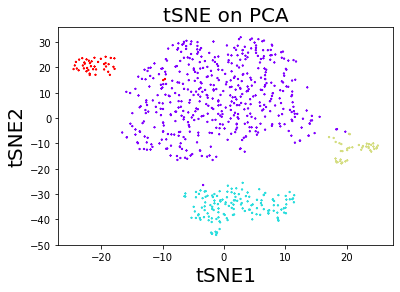

In [116]:
plt.scatter(tsne[:, 0], tsne[:, 1], c = Y, cmap = 'rainbow', s = 2, marker='x')
plt.title('tSNE on PCA', fontsize = 20)
plt.xlabel("tSNE1", fontsize = 20)
plt.ylabel("tSNE2", fontsize = 20)

It is apparent that tSNE perform s much better the linear methods. However, non-linear is no guarantee of success itself.

In [71]:
from sklearn.manifold import Isomap

Text(0, 0.5, 'ISO2')

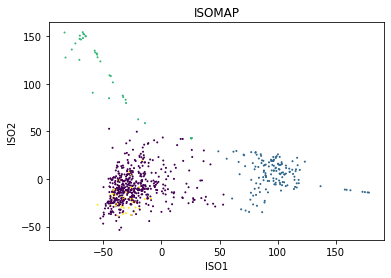

In [72]:
model = Isomap()
isomap = model.fit_transform(X_reduced)
plt.scatter(isomap[:, 0], isomap[:, 1], c = Y, cmap = 'viridis', s = 1)
plt.title('ISOMAP')
#plt.colorbar()
plt.xlabel("ISO1")
plt.ylabel("ISO2")

#### UMAP

In [70]:
# todo: install umap
#from umap import UMAP

ModuleNotFoundError: No module named 'umap'

In [ ]:
print("Performing Uniform Manifold Approximation and Projection (UMAP) ...")
plt.subplot(339)
model = UMAP(n_neighbors = 30, min_dist = 0.3, n_components = 2)
umap = model.fit_transform(X_reduced)
plt.scatter(umap[:, 0], umap[:, 1], c = Y, cmap = 'viridis', s = 1)
plt.title('UMAP')
#plt.colorbar()
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")